In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/drug200.csv')

**Predicted label:**

- Drug type

**Features:**

- Age of patient
- Sex of patient
- Blood Pressure Levels (BP)
- Cholesterol Levels
- Na to Potassium Ratio

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [5]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [7]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [8]:
df['Drug'] = df['Drug'].transform(lambda value: value[-1])

In [9]:
df['Drug']

0      Y
1      C
2      C
3      X
4      Y
      ..
195    C
196    C
197    X
198    X
199    X
Name: Drug, Length: 200, dtype: object

In [10]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,Y
1,47,M,LOW,HIGH,13.093,C
2,47,M,LOW,HIGH,10.114,C
3,28,F,NORMAL,HIGH,7.798,X
4,61,F,LOW,HIGH,18.043,Y


# Exploratory Data Analysis

<AxesSubplot:xlabel='Drug', ylabel='count'>

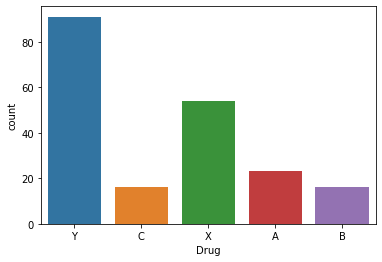

In [11]:
sns.countplot(x='Drug',data=df)

<AxesSubplot:xlabel='Drug', ylabel='count'>

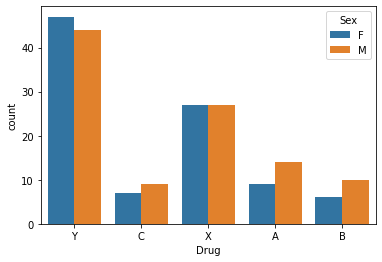

In [12]:
sns.countplot(x='Drug',hue='Sex',data=df)

<AxesSubplot:xlabel='Age', ylabel='Drug'>

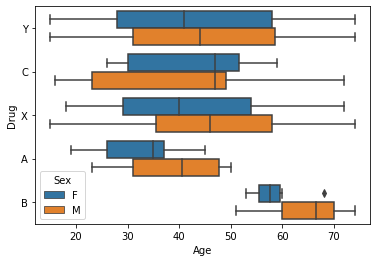

In [13]:
sns.boxplot(x='Age',y='Drug',hue='Sex',data=df)

<AxesSubplot:xlabel='Cholesterol', ylabel='count'>

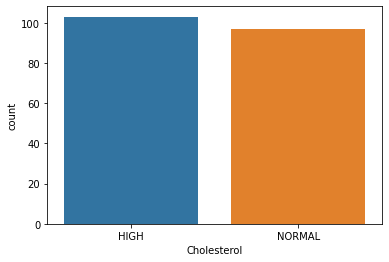

In [14]:
sns.countplot(x='Cholesterol',data=df)

<AxesSubplot:xlabel='BP', ylabel='count'>

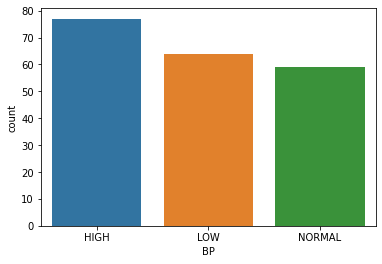

In [15]:
sns.countplot(x='BP',data=df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

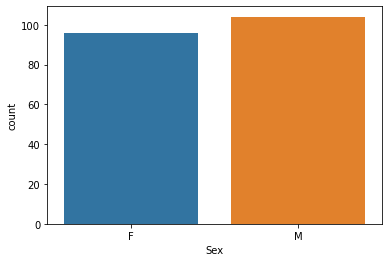

In [16]:
sns.countplot(x='Sex',data=df)

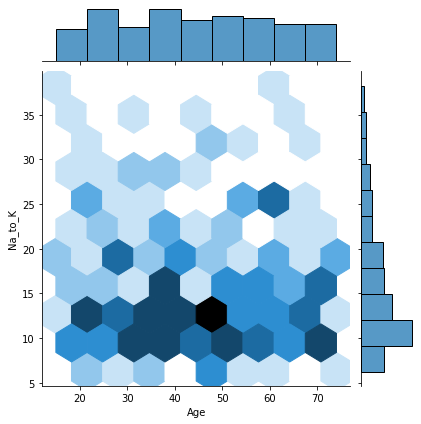

In [17]:
sns.jointplot(data=df,x='Age',y='Na_to_K',kind='hex')

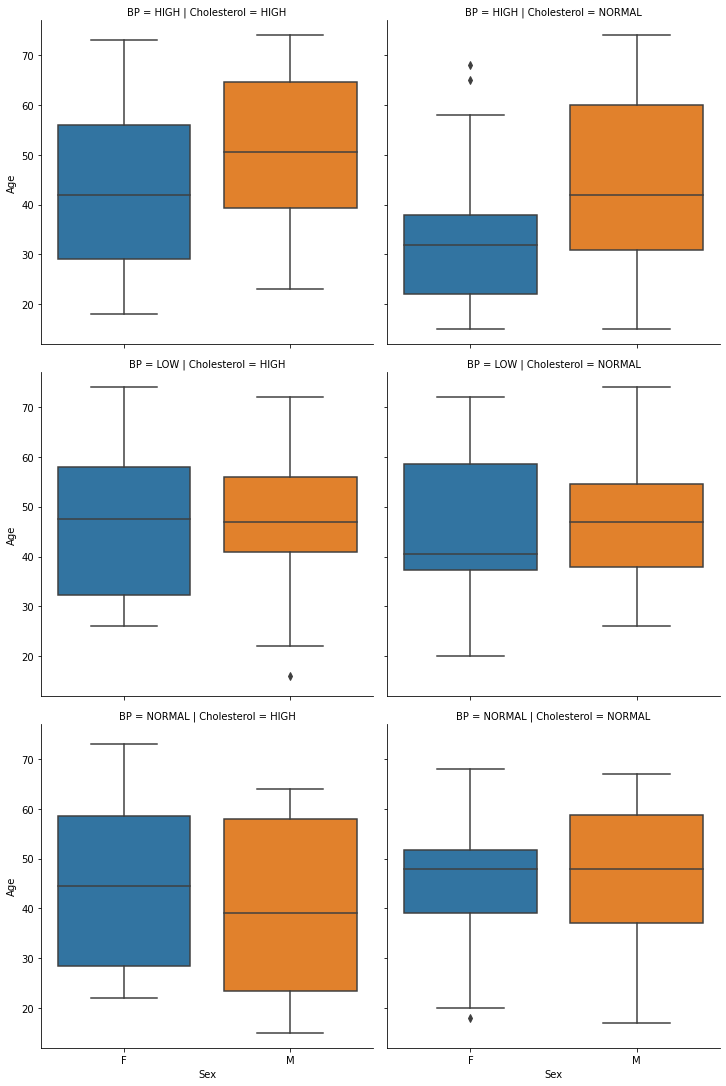

In [18]:
sns.catplot(data=df,x='Sex',y='Age',kind='box',
           col='Cholesterol',row='BP')

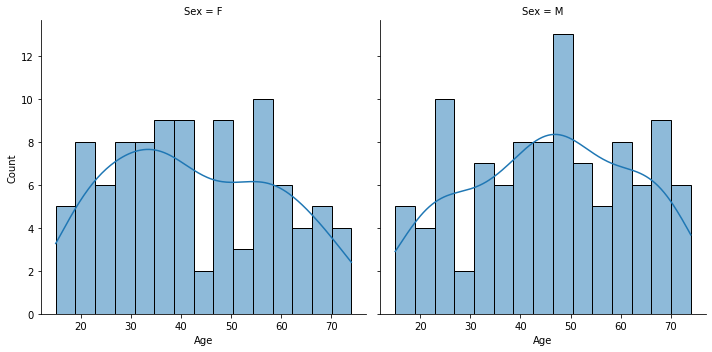

In [19]:
sns.displot(x='Age',col='Sex',data=df,bins=15,kde=True)

<AxesSubplot:xlabel='Age', ylabel='Na_to_K'>

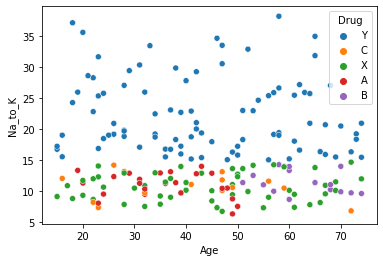

In [20]:
sns.scatterplot(x='Age',y='Na_to_K',hue='Drug',data=df)

# Feature Engineering 

In [21]:
df['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [22]:
df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

### Ordinal Encoding

In [23]:
bp_map = {'LOW':0,'NORMAL':1,'HIGH':2}

In [24]:
df['BP'] = df['BP'].replace(bp_map)

In [25]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,2,HIGH,25.355,Y
1,47,M,0,HIGH,13.093,C
2,47,M,0,HIGH,10.114,C
3,28,F,1,HIGH,7.798,X
4,61,F,0,HIGH,18.043,Y


 ### One-Hot Encoding

In [26]:
dummie_df  = pd.get_dummies(df[['Cholesterol','Sex']],drop_first=True)

In [27]:
dummie_df

,Cholesterol_NORMAL,Sex_M
0,0,0
1,0,1
2,0,1
3,0,0
4,0,0
...,...,...
195,0,0
196,0,1
197,0,1
198,1,1


In [28]:
df = pd.concat([df,dummie_df],axis=1)

In [29]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Cholesterol_NORMAL,Sex_M
0,23,F,2,HIGH,25.355,Y,0,0
1,47,M,0,HIGH,13.093,C,0,1
2,47,M,0,HIGH,10.114,C,0,1
3,28,F,1,HIGH,7.798,X,0,0
4,61,F,0,HIGH,18.043,Y,0,0


In [30]:
df = df.drop(['Sex','Cholesterol'],axis=1)

In [31]:
df.head()

,Age,BP,Na_to_K,Drug,Cholesterol_NORMAL,Sex_M
0,23,2,25.355,Y,0,0
1,47,0,13.093,C,0,1
2,47,0,10.114,C,0,1
3,28,1,7.798,X,0,0
4,61,0,18.043,Y,0,0


In [32]:
df = df[['Age','Sex_M','BP','Cholesterol_NORMAL','Na_to_K','Drug']]

In [33]:
df.head()

,Age,Sex_M,BP,Cholesterol_NORMAL,Na_to_K,Drug
0,23,0,2,0,25.355,Y
1,47,1,0,0,13.093,C
2,47,1,0,0,10.114,C
3,28,0,1,0,7.798,X
4,61,0,0,0,18.043,Y


In [34]:
df.columns = ['Age','Sex_Male','BP','Cholesterol_Normal','Na_to_K','Drug']

In [35]:
df.head()

,Age,Sex_Male,BP,Cholesterol_Normal,Na_to_K,Drug
0,23,0,2,0,25.355,Y
1,47,1,0,0,13.093,C
2,47,1,0,0,10.114,C
3,28,0,1,0,7.798,X
4,61,0,0,0,18.043,Y


# Random Forests Using GridSearchCV and Parameter Search

In [36]:
X = df.drop('Drug',axis=1)

In [37]:
y = df['Drug']

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
n_estimators = [64,100,128,200]

In [42]:
max_features = [2,3,4,5]

In [43]:
bootstrap = [True,False]

In [44]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap}

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rfc = RandomForestClassifier()

In [47]:
grid = GridSearchCV(rfc,param_grid)

In [48]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [2, 3, 4, 5],
                         'n_estimators': [64, 100, 128, 200]})

In [49]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 64}

In [50]:
predictions = grid.predict(X_test)

In [51]:
predictions

array(['X', 'Y', 'B', 'Y', 'A', 'Y', 'B', 'Y', 'X', 'B', 'X', 'X', 'A',
       'C', 'Y', 'C', 'Y', 'X', 'X', 'X', 'Y', 'Y', 'Y', 'A', 'Y', 'Y',
       'Y', 'X', 'Y', 'C'], dtype=object)

In [52]:
y_test

37     X
109    Y
31     B
89     Y
66     A
119    Y
54     B
74     Y
145    X
142    B
148    X
112    X
174    A
55     C
141    Y
149    C
25     Y
34     X
170    X
39     X
172    Y
153    X
175    Y
61     A
65     Y
50     Y
42     Y
129    X
179    Y
2      C
Name: Drug, dtype: object

# Performance Evaluation

In [53]:
from sklearn.metrics import plot_confusion_matrix,classification_report,accuracy_score

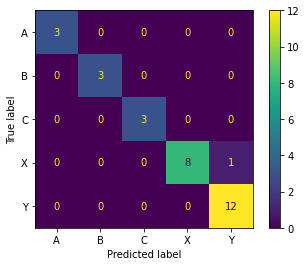

In [54]:
plot_confusion_matrix(grid,X_test,y_test)

In [55]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00         3
           B       1.00      1.00      1.00         3
           C       1.00      1.00      1.00         3
           X       1.00      0.89      0.94         9
           Y       0.92      1.00      0.96        12

    accuracy                           0.97        30
   macro avg       0.98      0.98      0.98        30
weighted avg       0.97      0.97      0.97        30



In [56]:
errors = []
misclassifications = []

for n in range(1,200):
    rfc = RandomForestClassifier(n_estimators=n,max_features=2)
    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    err = 1 - accuracy_score(y_test,preds)
    n_missed = np.sum(preds != y_test)
    
    errors.append(err)
    misclassifications.append(n_missed)

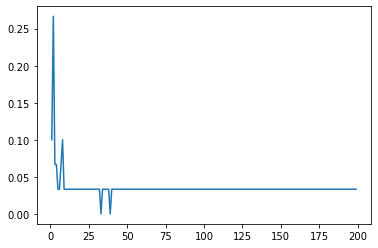

In [57]:
plt.plot(range(1,200),errors)

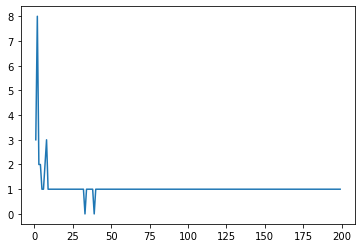

In [58]:
plt.plot(range(1,200),misclassifications)

In [59]:
# Performance starts to level off at around 13 decision trees